## <font color='purple'> Lab01 </font>

### <font color='purple'> Thông tin nhóm </font>

| Họ tên        | MSSV   | Công việc           | Hoàn thành |
|---------------|--------|---------------------|------------|
| Nguyễn Minh Đạt  | 21127592 | Phân tích & Đặt câu hỏi   | 100%       |
| Nguyễn Minh Đạt  | 21127592 | Thống kê số lượng và tỉ lệ sống sót   | 100%       |
| Nguyễn Minh Đạt  | 21127592 | Phân tích mối quan hệ giữa giá vé, hạng vé và tỉ lệ sống sót   | 100%       |
| Nguyễn Nhật Truyền  | 21127191 | Phân tích & Đặt câu hỏi   | 100%       |
| Nguyễn Nhật Truyền    | 21127191 | Phân tích mối quan hệ giữa giới tính, độ tuổi đối với tỉ lệ sống sót  | 100%      |
| Nguyễn Nhật Truyền    | 21127191 | Phân tích mối quan hệ giữa số lượng người thân đi cùng đối với tỉ lệ sống sót  | 100%      |


### <font color='purple'> Cài đặt môi trường </font>

In [1]:
!git clone https://github.com/tinongdan/titanic.git

fatal: destination path 'titanic' already exists and is not an empty directory.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### <font color='purple'> Đọc dữ liệu </font>

In [3]:
train_df = pd.read_csv('titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <font color='purple'> So sánh số lượng và tỉ lệ giữa những người sống sót với những người tử vong </font>

In [5]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
non_survivors = train_df[train_df['Survived'] == 0]
survivors = train_df[train_df['Survived'] == 1]

print("Number of people who did not survive:", len(non_survivors))
print("Number of people who survived:", len(survivors))

Number of people who did not survive: 549
Number of people who survived: 342


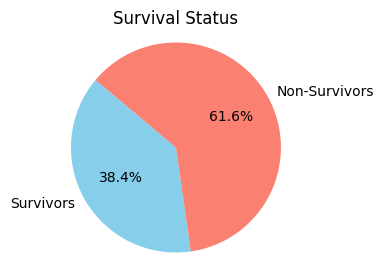

In [7]:
# Data
labels = ['Survivors', 'Non-Survivors']
sizes = [len(survivors), len(non_survivors)]
colors = ['skyblue', 'salmon']

# Plot
plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival Status')
plt.axis('equal')
plt.show()

### <font color='purple'> Phân tích mối quan hệ giữa các yếu tố đối với khả năng sống sót </font>

#### <font color='black'> Thuộc tính: **Giá vé**, **Hạng vé** </font>

In [8]:
train_df['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [9]:
survivor_ticket_class1 = survivors[survivors['Pclass'] == 1]
survivor_ticket_class2 = survivors[survivors['Pclass'] == 2]
survivor_ticket_class3 = survivors[survivors['Pclass'] == 3]
non_survivor_ticket_class1 = non_survivors[non_survivors['Pclass'] == 1]
non_survivor_ticket_class2 = non_survivors[non_survivors['Pclass'] == 2]
non_survivor_ticket_class3 = non_survivors[non_survivors['Pclass'] == 3]

In [10]:
count_survivor_ticket_class1 = len(survivor_ticket_class1)
count_survivor_ticket_class2 = len(survivor_ticket_class2)
count_survivor_ticket_class3 = len(survivor_ticket_class3)
count_non_survivor_ticket_class1 = len(non_survivor_ticket_class1)
count_non_survivor_ticket_class2 = len(non_survivor_ticket_class2)
count_non_survivor_ticket_class3 = len(non_survivor_ticket_class3)

In [11]:
print(count_survivor_ticket_class1, count_non_survivor_ticket_class1)
print(count_survivor_ticket_class2, count_non_survivor_ticket_class2)
print(count_survivor_ticket_class3, count_non_survivor_ticket_class3)

136 80
87 97
119 372


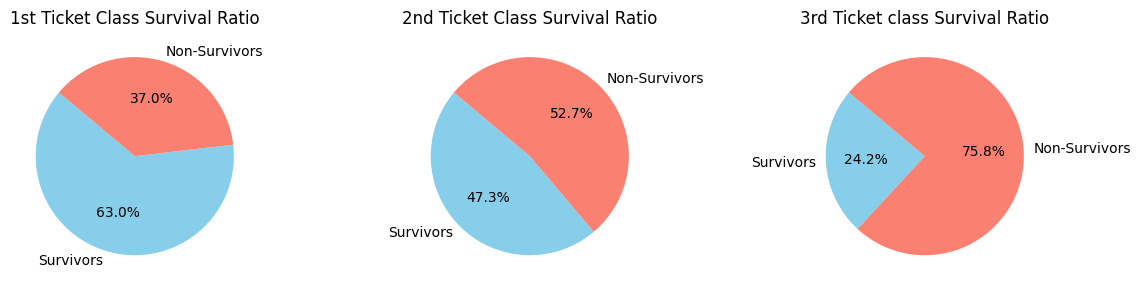

In [12]:
# Data for the first pie chart (ticket class 1)
class1_labels = ['Survivors', 'Non-Survivors']
class1_sizes = [count_survivor_ticket_class1, count_non_survivor_ticket_class1]
class1_colors = ['skyblue', 'salmon']

# Data for the second pie chart (ticket class 2)
class2_labels = ['Survivors', 'Non-Survivors']
class2_sizes = [count_survivor_ticket_class2, count_non_survivor_ticket_class2]
class2_colors = ['skyblue', 'salmon']

# Data for the third pie chart (ticket class 3)
class3_labels = ['Survivors', 'Non-Survivors']
class3_sizes = [count_survivor_ticket_class3, count_non_survivor_ticket_class3]
class3_colors = ['skyblue', 'salmon']

# Create subplots with larger figure size
plt.figure(figsize=(12, 3))

# Plot the first pie chart (ticket class 1)
plt.subplot(1, 3, 1)
plt.pie(class1_sizes, labels=class1_labels, colors=class1_colors, autopct='%1.1f%%', startangle=140)
plt.title('1st Ticket Class Survival Ratio')

# Plot the second pie chart (ticket class 2)
plt.subplot(1, 3, 2)
plt.pie(class2_sizes, labels=class2_labels, colors=class2_colors, autopct='%1.1f%%', startangle=140)
plt.title('2nd Ticket Class Survival Ratio')

# Plot the third pie chart (ticket class 3)
plt.subplot(1, 3, 3)
plt.pie(class3_sizes, labels=class3_labels, colors=class3_colors, autopct='%1.1f%%', startangle=140)
plt.title('3rd Ticket class Survival Ratio')

plt.tight_layout()
plt.show()

In [13]:
average_fare_by_class = train_df.groupby('Pclass')['Fare'].mean()
print(average_fare_by_class)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


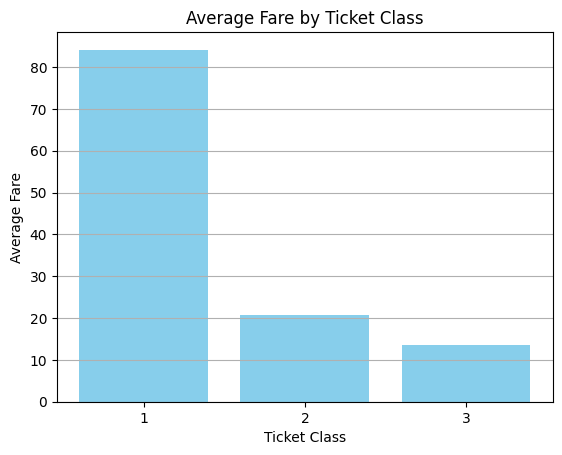

In [14]:
plt.bar(average_fare_by_class.index, average_fare_by_class.values, color='skyblue')

plt.xlabel('Ticket Class')
plt.ylabel('Average Fare')
plt.title('Average Fare by Ticket Class')
plt.xticks(average_fare_by_class.index)
plt.grid(axis='y')
plt.show()

Nhận xét xu hướng:

*   Hạng vé cao giúp gia tăng khả năng sống sót.

*   Tất nhiên, chúng ta phải trả nhiều tiền để có được hạng vé cao.





#### <font color='black'> Thuộc tính: **Giới tính** </font>

In [15]:
sex_counts = train_df['Sex'].value_counts()

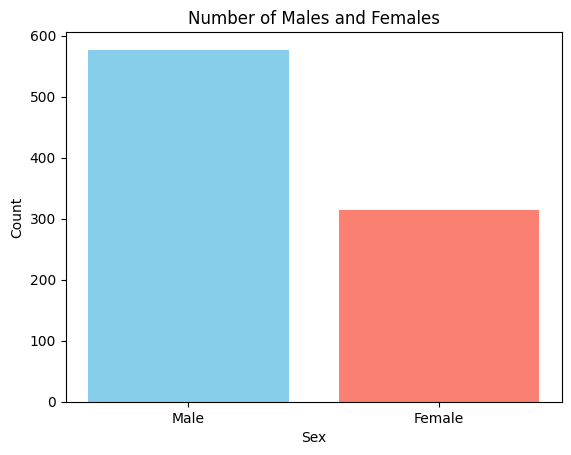

In [16]:
plt.bar(sex_counts.index, sex_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Males and Females')
plt.xticks(sex_counts.index, ['Male', 'Female'])  # Set x-ticks to 'Male' and 'Female'
plt.show()

In [17]:
female_survivors = survivors[survivors['Sex'] == 'female']
male_survivors = survivors[survivors['Sex'] == 'male']
female_non_survivors = non_survivors[non_survivors['Sex'] == 'female']
male_non_survivors = non_survivors[non_survivors['Sex'] == 'male']

In [18]:
count_female_survivors = len(female_survivors)
count_male_survivors = len(male_survivors)
count_female_non_survivors = len(female_non_survivors)
count_male_non_survivors = len(male_non_survivors)

In [19]:
print(count_female_survivors, count_female_non_survivors)
print(count_male_survivors, count_male_non_survivors)

233 81
109 468


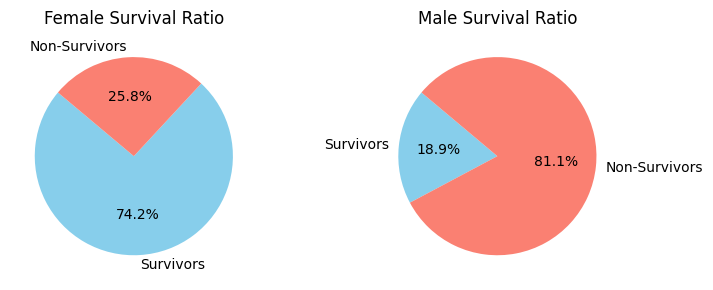

In [20]:
# Data for the first pie chart (female)
female_labels = ['Survivors', 'Non-Survivors']
female_sizes = [count_female_survivors, count_female_non_survivors]
female_colors = ['skyblue', 'salmon']

# Data for the second pie chart (male)
male_labels = ['Survivors', 'Non-Survivors']
male_sizes = [count_male_survivors, count_male_non_survivors]
male_colors = ['skyblue', 'salmon']

# Create subplots with larger figure size
plt.figure(figsize=(8, 3))

# Plot the first pie chart (female)
plt.subplot(1, 2, 1)
plt.pie(female_sizes, labels=female_labels, colors=female_colors, autopct='%1.1f%%', startangle=140)
plt.title('Female Survival Ratio')

# Plot the second pie chart (male)
plt.subplot(1, 2, 2)
plt.pie(male_sizes, labels=male_labels, colors=male_colors, autopct='%1.1f%%', startangle=140)
plt.title('Male Survival Ratio')

plt.tight_layout()
plt.show()

Nhận xét:


*   Số lượng nam giới trên tàu nhiều gần gấp đôi so với số lượng nữ giới.

*   Tuy nhiên, tỉ lệ tử vong ở nam giới là trên 80%

*   Trong khi đó, tỉ lệ tử vong ở nữ giới là chưa đến 26%.

*   Như vậy, giới tính có liên quan tới khả năng sống sót sau tai nạn.


#### <font color='black'> Thuộc tính: **Độ tuổi** </font>

In [21]:
train_df['Age'].value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [22]:
age_survivors = survivors['Age'].dropna()  # Drop NaN values
age_non_survivors = non_survivors['Age'].dropna()

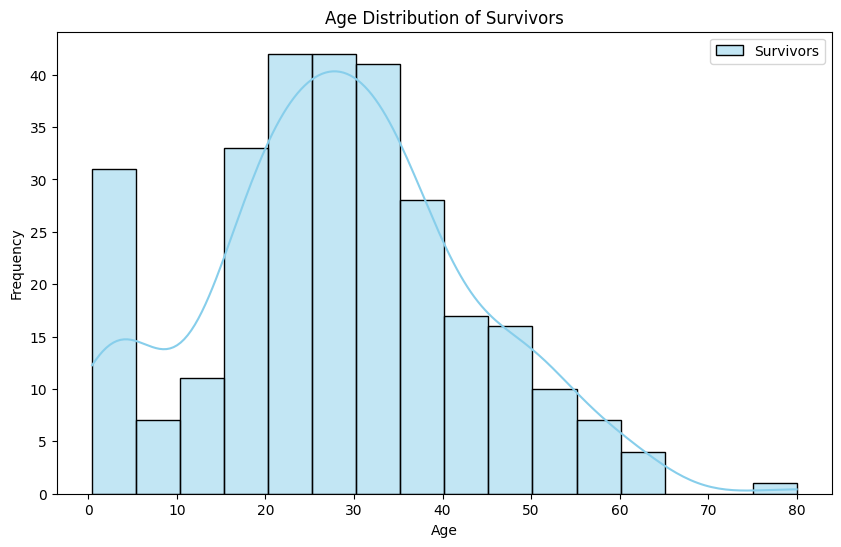

In [23]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

sns.histplot(age_survivors, color='skyblue', kde=True, label='Survivors')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survivors')
plt.legend()
plt.show()

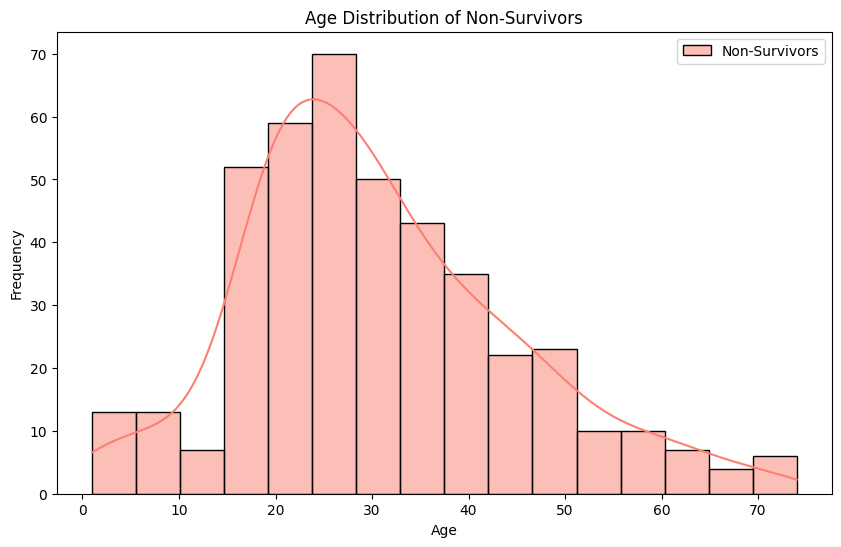

In [24]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

sns.histplot(age_non_survivors, color='salmon', kde=True, label='Non-Survivors')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Non-Survivors')
plt.legend()
plt.show()

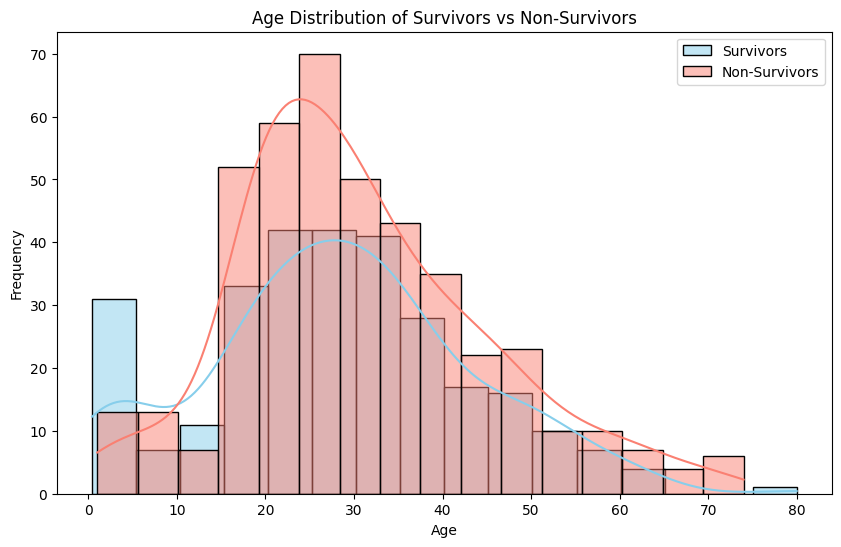

In [25]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for both survivors and non-survivors
sns.histplot(age_survivors, color='skyblue', kde=True, label='Survivors')
sns.histplot(age_non_survivors, color='salmon', kde=True, label='Non-Survivors')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.legend()
plt.show()

Nhận xét:

*   Trẻ em dưới 10 tuổi có khả năng sống sót cao.

*   Tuy nhiên nhìn chung, phân phối độ tuổi không có nhiều đặc trưng khác biệt giữa hai nhóm người.

*   Do đó, độ tuổi có thể không ảnh hưởng nhiều đến khả năng sống sót.



#### <font color='black'> Thuộc tính: **Số lượng anh/chị/em, vợ/chồng cùng đi trên tàu** </font>

In [26]:
sibsp_df = train_df['SibSp'].value_counts().sort_index()
sibsp_df

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

In [27]:
sibsp_counts = train_df['SibSp'].value_counts().sort_index().index.tolist()
sibsp_counts

[0, 1, 2, 3, 4, 5, 8]

In [28]:
survivor_sibsp = survivors['SibSp'].value_counts().sort_index()
for i in sibsp_counts:
    if i not in survivor_sibsp.index:
        survivor_sibsp.loc[i] = 0
survivor_sibsp.sort_index()

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: count, dtype: int64

In [29]:
non_survivor_sibsp = non_survivors['SibSp'].value_counts().sort_index()
for i in sibsp_counts:
    if i not in non_survivor_sibsp.index:
        non_survivor_sibsp.loc[i] = 0
non_survivor_sibsp.sort_index()

SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: count, dtype: int64

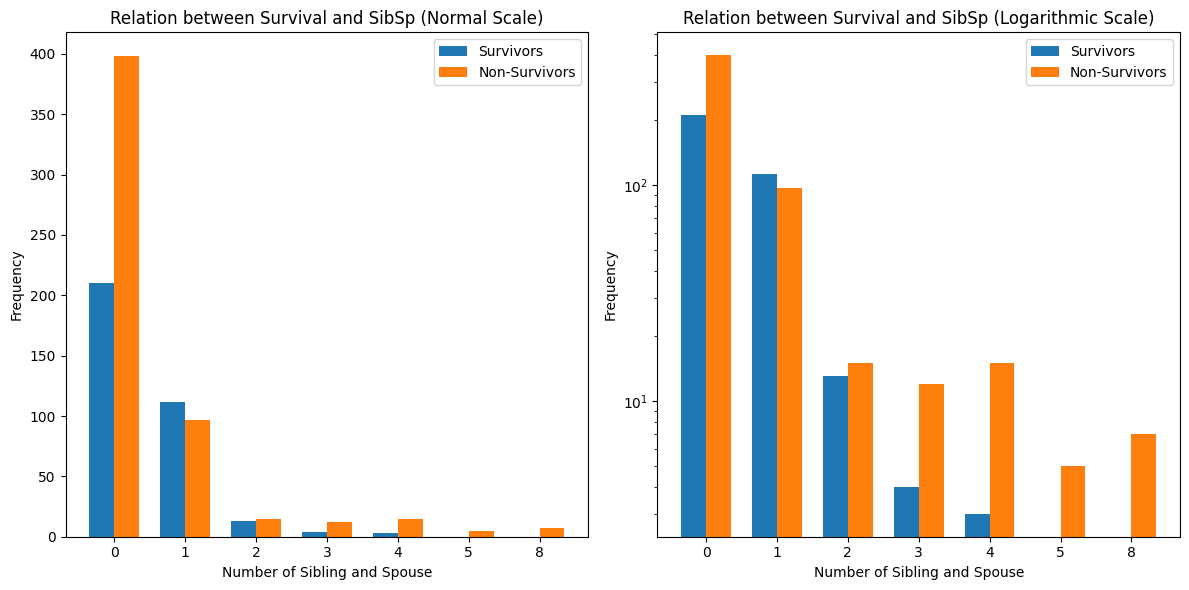

In [30]:
categories = sibsp_counts
values1 = survivor_sibsp
values2 = non_survivor_sibsp

plt.figure(figsize=(12, 6))

bar_width = 0.35
x = np.arange(len(categories))

plt.subplot(1, 2, 1)
plt.bar(x - bar_width/2, values1, width=bar_width, label='Survivors')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Non-Survivors')
plt.xlabel('Number of Sibling and Spouse')
plt.ylabel('Frequency')
plt.title('Relation between Survival and SibSp (Normal Scale)')
plt.xticks(x, categories)  # Set x-axis labels to categories
plt.legend()               # Show legend

plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, values1, width=bar_width, label='Survivors')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Non-Survivors')
plt.xlabel('Number of Sibling and Spouse')
plt.ylabel('Frequency')
plt.title('Relation between Survival and SibSp (Logarithmic Scale)')
plt.xticks(x, categories)  # Set x-axis labels to categories
plt.yscale('log')          # Apply logarithmic scale to y-axis
plt.legend()               # Show legend

plt.tight_layout()
plt.show()

Nhận xét:

*   Không đi với bất kì ai trong số anh, chị, em, vợ, chồng có tỉ lệ tử vong cao gần như gấp đôi so với tỉ lệ sống sót.

*   Đi cùng 1 người trong số anh/chị/em, vợ/chồng có tỉ lệ sống sót nhỉnh hơn tỉ lệ tử vong.

*   Đi cùng từ 3 người trở lên trong số anh/chị/em, vợ/chồng có tỉ lệ tử vong cao nhất.

*   Như vậy, lựa chọn đi cùng từ 1 người trong số anh/chị/em, vợ/chồng là tốt nhất.


#### <font color='black'> Thuộc tính: **Số lượng bố mẹ và con cái cùng đi trên tàu.** </font>

In [31]:
train_df['Parch'].value_counts().sort_index()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

In [32]:
parch_counts = train_df['Parch'].value_counts().sort_index().index.tolist()
parch_counts

[0, 1, 2, 3, 4, 5, 6]

In [33]:
survivor_parch = survivors['Parch'].value_counts().sort_index()
for i in parch_counts:
    if i not in survivor_parch.index:
        survivor_parch.loc[i] = 0
survivor_parch.sort_index()

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: count, dtype: int64

In [34]:
non_survivor_parch = non_survivors['Parch'].value_counts().sort_index()
for i in parch_counts:
    if i not in non_survivor_parch.index:
        non_survivor_parch.loc[i] = 0
non_survivor_parch.sort_index()

Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: count, dtype: int64

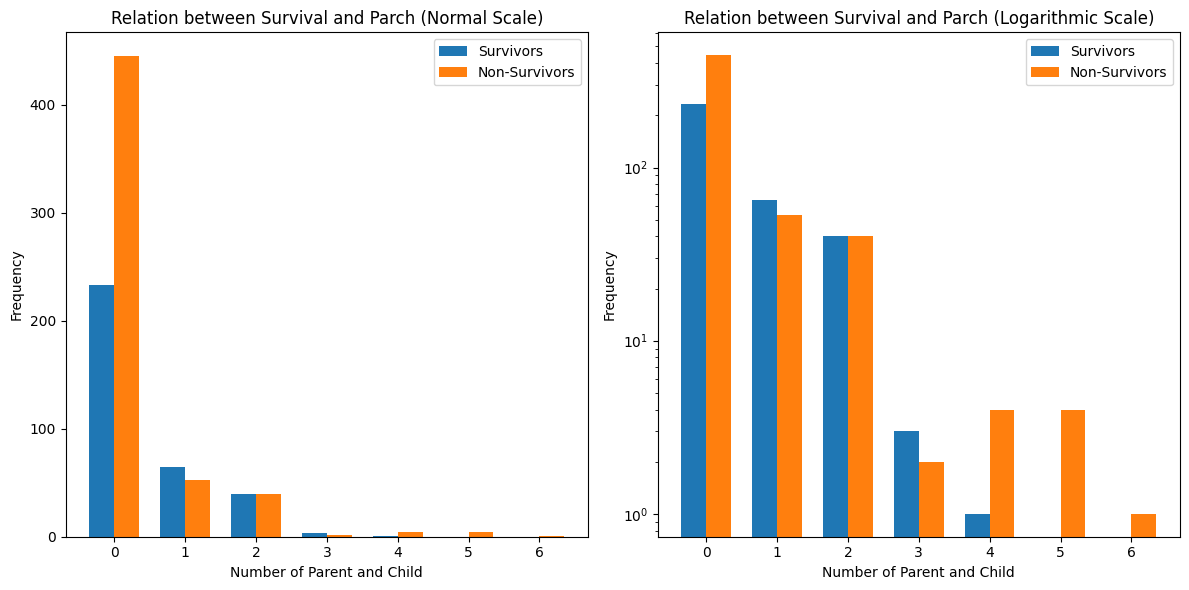

In [35]:
categories = parch_counts
values1 = survivor_parch
values2 = non_survivor_parch

plt.figure(figsize=(12, 6))

bar_width = 0.35
x = np.arange(len(categories))

plt.subplot(1, 2, 1)
plt.bar(x - bar_width/2, values1, width=bar_width, label='Survivors')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Non-Survivors')
plt.xlabel('Number of Parent and Child')
plt.ylabel('Frequency')
plt.title('Relation between Survival and Parch (Normal Scale)')
plt.xticks(x, categories)  # Set x-axis labels to categories
plt.legend()               # Show legend

plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, values1, width=bar_width, label='Survivors')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Non-Survivors')
plt.xlabel('Number of Parent and Child')
plt.ylabel('Frequency')
plt.title('Relation between Survival and Parch (Logarithmic Scale)')
plt.xticks(x, categories)  # Set x-axis labels to categories
plt.yscale('log')          # Apply logarithmic scale to y-axis
plt.legend()               # Show legend

plt.tight_layout()
plt.show()

Nhận xét:

*   Không đi cùng bất kì ai trong số bố mẹ và con cái có tỉ lệ tử vong cao gần gấp đôi so với tỉ lệ sống sót.

*   Đi cùng 1 hoặc 3 người trong số bố/mẹ/con cái có tỉ lệ sống sót nhỉnh hơn tỉ lệ tử vong.

*   Đi cùng từ 4 người trở lên trong số bố/mẹ/con cái có tỉ lệ tử vong cao nhất.

*   Như vậy, đi cùng từ 1 hoặc 3 người trong số bố/mẹ/con cái là lựa chọn tốt nhất.